<a href="https://colab.research.google.com/github/edoruin/Academic-Notebooks-/blob/main/Maximos_GoleadoresEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo Examen Parcial


  **Nombre:** Edwin Jeremías Agustín Yack

  **Matricula:** 2024-0391


### Teoria:

In [ ]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ITLA Class/C-4/Analitica Descriptiva/Goleadores_Historicos.csv')
data.columns = data.columns.str.strip() #limpieza de espacios en blanco
data.head(5)

,Jugador,Goles,P_J,Temp
0,Abe Lenstra,645,650.0,1936-1963
1,Alan Shearer,382,733.0,1986-2005
2,Albert De Cleyn,386,500.0,1933-1955
3,Alberto Spencer,451,678.0,1953-1972
4,Aleksandar Đurić,461,733.0,1994-2014


In [ ]:
#Datos originales:
data_Original = data.copy() #crea una copia de los datos en la variable
"""
Posteriormente se
hablara acerca del
significado de esta variable
"""

'\nPosteriormente se\nhablara acerca del\nsignificado de esta variable\n'

#### Identifique valores atípicos en las variables partidos jugados y goles anotados. ¿Estos son atípicos reales o errores en los datos?

In [ ]:
#Valores atipicos:

#goles anotados:
Q1_G= np.percentile(data['Goles'], 25) #calculamos los percentiles 25% y 75% para calcular el rango intercuartilico
Q3_G = np.percentile(data['Goles'], 75)
IQR_G = Q3_G - Q1_G


"""
Lower_bound es el limite de los bigotes inferiores
Upper_bound es el limite de los bigotes superiores
"""

lower_bound_G= Q1_G - 1.5 * IQR_G #limites de Goles
upper_bound_G = Q3_G + 1.5 * IQR_G

#partidos jugados:
Q1_J = np.percentile(data['P_J'], 25) #calculamos los percentiles 25% y 75% para calcular el rango intercuartilico
Q3_J = np.percentile(data['P_J'], 75)
IQR_J = Q3_J - Q1_J

lower_bound_J= Q1_J - 1.5 * IQR_J #Limites de partidos jugados
upper_bound_J = Q3_J + 1.5 * IQR_J

Goles_lower = data[data["Goles"] < lower_bound_G] #valores atipicos  Goles
Goles_upper = data[data["Goles"] > upper_bound_G]
print(f'Valores atípicos en Goles:\n\nLímite Inferior:\n{Goles_lower}\n\nLímite Superior:\n{Goles_upper}\n\n\n')

P_J_lower = data[data["P_J"] < lower_bound_J] #valores atipicos Partidos jugados
P_J_upper = data[data["P_J"] > upper_bound_J]
print(f'Valores atípicos en Partidos Jugados:\n\nLímite Inferior:\n{P_J_lower}\n\nLímite Superior:\n{P_J_upper}')

Valores atípicos en Goles:

Límite Inferior:
Empty DataFrame
Columns: [Jugador, Goles, P_J, Temp]
Index: []

Límite Superior:
              Jugador  Goles     P_J       Temp
17  Cristiano Ronaldo    928  1270.0   2002-Act
28     Erwin Helmchen    702     NaN  1923-1951
32      Ferenc Puskás    760   746.0  1943-1967
60        Josef Bican    805   530.0  1931-1955
66       Lionel Messi    854  1088.0   2004-Act
77               Pelé    770   812.0  1956-1977
87            Romário    761   963.0  1985-2009



Valores atípicos en Partidos Jugados:

Límite Inferior:
Empty DataFrame
Columns: [Jugador, Goles, P_J, Temp]
Index: []

Límite Superior:
Empty DataFrame
Columns: [Jugador, Goles, P_J, Temp]
Index: []


#### NOTA:

En partidos jugados hay un solo valor atipico, descartado porque no aparecio en el rango IQR; solo en el grafico de cajas, pero en cuanto la cantidad de goles hay algunos futbolistas que generan valores atipicos, y coincidencialmente son los primeros en la lista de goleadores.

* Respuesta: Esto se debe a que en el futbol hay un grupo de jugadores que tienen una carrera consideradas incluso por los analistas expertos, fuera de serie! estos no son datos falsos, estos jugadores demostraron un desarrollo muy superior a los demás, o fueron apoyados por la cantidad de partidos jugados o mostraron una destreza voraz al momento de anotar.

#### Visualizaciones de los valores:

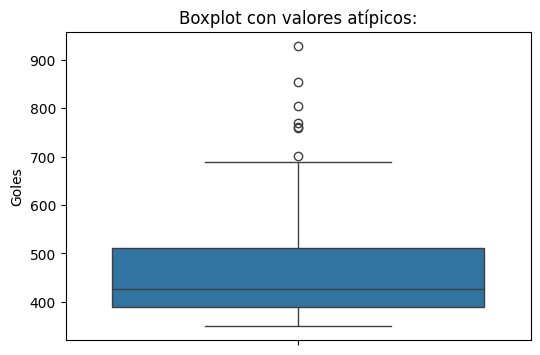

In [ ]:
#creamos un grafico de cajas para analizar los atipicos

plt.figure(figsize=(6, 4))
sns.boxplot(data=data['Goles'])
plt.title("Boxplot con valores atípicos:")
plt.show()

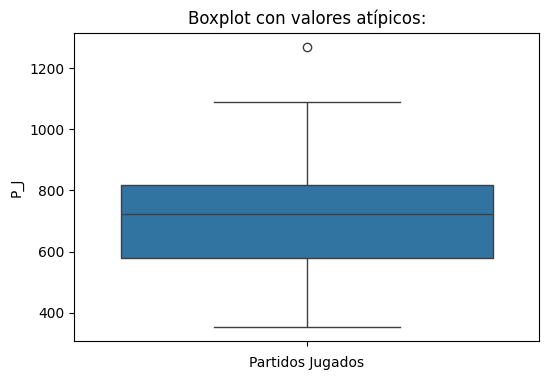

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['P_J'])
plt.title("Boxplot con valores atípicos:")
plt.xlabel("Partidos Jugados")
plt.show()

In [ ]:
data[['Jugador','P_J']].sort_values(by='P_J', ascending=False).head(5) #el valor atipico en partidos jugados corresponde a Cristiano Ronaldo, no es falto

,Jugador,P_J
17,Cristiano Ronaldo,1270.0
66,Lionel Messi,1088.0
40,Glenn Ferguson,1047.0
80,Raúl González,1034.0
82,Rivaldo,1033.0


#### Valores N/A

Los valores perdidos solo son 9, corresponden a los jugadores de tiempos anteriores,  en esas epocas no se registraban los partidos de hecho, al investigar en paginas oficiales y muy transcurridas por expertos(transfermarket y footystats) descubri que solo los partidos de seleccion de estos jugadores antiguos fueron registrados.

In [ ]:
print(f' {data.isnull().sum()}') #procedere a agregar un 0 a estos jugadores, ya que son datos inciertos

 Jugador    0
Goles      0
P_J        9
Temp       0
dtype: int64


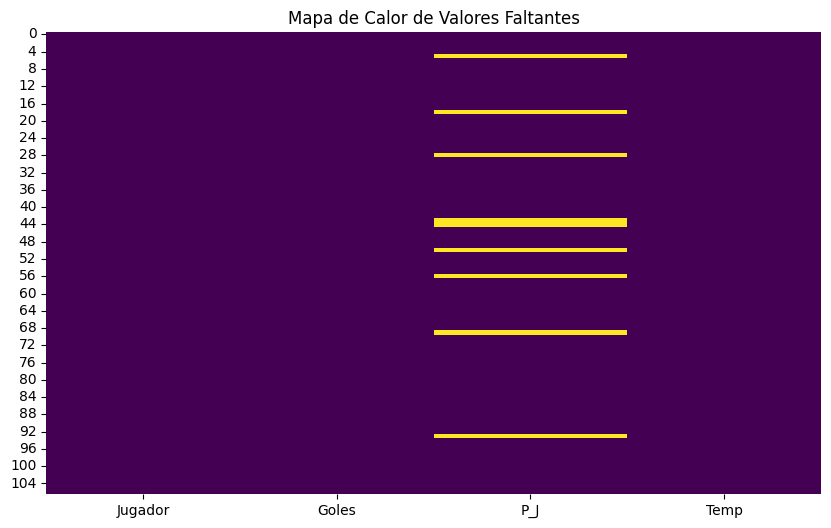

In [ ]:
#data con faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()

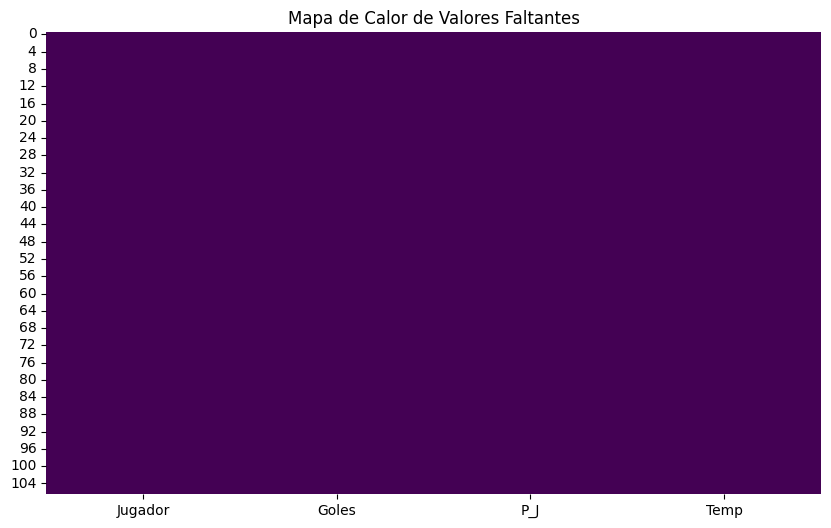

In [ ]:
data.fillna(1,inplace=True) #rellena los valores nulos con un 1, inplace=True lo guarda en el dataset original
#data despues de aplicar la limpieza
#data con faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()
#rellenamos con 1 para evitar dañar los bins en los proximos codigos

### Practica:

Mapeando la variable pais y agregandola en la base de datos:

In [ ]:
#Diccionario de los paises por nombre de jugador:



jugadores_paises = {
    "Abe Lenstra": "Países Bajos",
    "Alan Shearer": "Inglaterra",
    "Albert De Cleyn": "Bélgica",
    "Alberto Spencer": "Ecuador",
    "Aleksandar Đurić": "Singapur",
    "Alex": "Brasil",
    "Alfredo Di Stéfano": "Argentina",
    "Ali Ashfaq": "Maldivas",
    "Ali Mabkhout": "Emiratos Árabes Unidos",
    "Ally McCoist": "Escocia",
    "André-Pierre Gignac": "Francia",
    "Andriy Shevchenko": "Ucrania",
    "Arthur Friedenreich": "Brasil",
    "Bader Al-Mutawa": "Kuwait",
    "Cabinho": "Brasil",
    "Carlos Bianchi": "Argentina",
    "Carlos Hermosillo": "México",
    "Cristiano Ronaldo": "Portugal",
    "Dadá Maravilha": "Brasil",
    "David Villa": "España",
    "Dayro Moreno": "Colombia",
    "Dejan Damjanović": "Montenegro",
    "Delio Onnis": "Argentina",
    "Didier Drogba": "Costa de Marfil",
    "Dixie Dean": "Inglaterra",
    "Edin Džeko": "Bosnia y Herzegovina",
    "Edinson Cavani": "Uruguay",
    "Eran Zahavi": "Israel",
    "Erwin Helmchen": "Alemania",
    "Eusébio": "Portugal",
    "Ferenc Bene": "Hungría",
    "Ferenc Deák": "Hungría",
    "Ferenc Puskás": "Hungría",
    "Ferenc Szusza": "Hungría",
    "Fernando Peyroteo": "Portugal",
    "Firas Al-Khatib": "Siria",
    "Fred": "Brasil",
    "Fritz Walter": "Alemania",
    "Gerd Müller": "Alemania",
    "Givanildo de Souza Hulk": "Brasil",
    "Glenn Ferguson": "Irlanda del Norte",
    "Gonzalo Higuaín": "Argentina",
    "Gunnar Nordahl": "Suecia",
    "György Sárosi": "Hungría",
    "Gyula Zsengellér": "Hungría",
    "Hans Krankl": "Austria",
    "Harry Kane": "Inglaterra",
    "Hughie Ferguson": "Escocia",
    "Hughie Gallacher": "Escocia",
    "Hugo Sánchez": "México",
    "Imre Schlosser": "Hungría",
    "Isidro Lángara": "España",
    "Jef Mermans": "Bélgica",
    "Jimmy Greaves": "Inglaterra",
    "Jimmy Jones": "Irlanda del Norte",
    "Jimmy McGrory": "Escocia",
    "Joe Bambrick": "Irlanda del Norte",
    "Johan Cruyff": "Países Bajos",
    "John Aldridge": "Irlanda",
    "José Águas": "Portugal",
    "Josef Bican": "Austria / Checoslovaquia",
    "József Takacs": "Hungría",
    "Juan Plata": "Ecuador",
    "Karim Benzema": "Francia",
    "Klaas-Jan Huntelaar": "Países Bajos",
    "Kylian Mbappé": "Francia",
    "Lionel Messi": "Argentina",
    "Luís Fabiano": "Brasil",
    "Luis Suárez": "Uruguay",
    "Magno Alves": "Brasil",
    "Max Morlock": "Alemania",
    "Michel Platini": "Francia",
    "Mohamed Salah": "Egipto",
    "Neymar": "Brasil",
    "Omar Al Soma": "Siria",
    "Óscar Cardozo": "Paraguay",
    "Osvaldo Castro": "Chile",
    "Pelé": "Brasil",
    "Pierre Aubameyang": "Gabón",
    "Radamel Falcao": "Colombia",
    "Raúl González": "España",
    "Ricardo Oliveira": "Brasil",
    "Rivaldo": "Brasil",
    "Robbie Keane": "Irlanda",
    "Robert Lewandowski": "Polonia",
    "Roberto Dinamite": "Brasil",
    "Roger Milla": "Camerún",
    "Romário": "Brasil",
    "Romelu Lukaku": "Bélgica",
    "Ronaldinho": "Brasil",
    "Ronaldo Nazário": "Brasil",
    "Ruud van Nistelrooy": "Países Bajos",
    "Samuel Eto'o": "Camerún",
    "Sándor Kocsis": "Hungría",
    "Sebastián Abreu": "Uruguay",
    "Sergio Agüero": "Argentina",
    "Stjepan Bobek": "Yugoslavia / Croacia",
    "Sunil Chhetri": "India",
    "Telmo Zarra": "España",
    "Thierry Henry": "Francia",
    "Túlio Maravilha": "Brasil",
    "Uwe Seeler": "Alemania",
    "Vágner Love": "Brasil",
    "Víctor Hugo Antelo": "Bolivia",
    "Wayne Rooney": "Inglaterra",
    "Zico": "Brasil",
    "Zlatan Ibrahimović": "Suecia"
}


#Aplicando el diccionario: Mapeo

data["Pais"] = data["Jugador"].map(jugadores_paises)


#imprimimos la data con la nueva columna:
data.head(5)

,Jugador,Goles,P_J,Temp,Pais
0,Abe Lenstra,645,650.0,1936-1963,Países Bajos
1,Alan Shearer,382,733.0,1986-2005,Inglaterra
2,Albert De Cleyn,386,500.0,1933-1955,Bélgica
3,Alberto Spencer,451,678.0,1953-1972,Ecuador
4,Aleksandar Đurić,461,733.0,1994-2014,Singapur


#### Discretizacion

In [ ]:
data.head()

,Jugador,Goles,P_J,Temp,Pais
0,Abe Lenstra,645,650.0,1936-1963,Países Bajos
1,Alan Shearer,382,733.0,1986-2005,Inglaterra
2,Albert De Cleyn,386,500.0,1933-1955,Bélgica
3,Alberto Spencer,451,678.0,1953-1972,Ecuador
4,Aleksandar Đurić,461,733.0,1994-2014,Singapur


In [ ]:
#Goles anotados (en intervalos)

"""
Segun la regla de sturges
me dio de 9 bins de 100 en 100
"""
# Crear intervalos para los goles anotados
bins_G = [349, 450, 550, 650, 750, 850, 950]
labels_G = ['349-450', '451-550', '551-650', '651-750', '751-850', '851-950']


"""
Segun la regla de sturges
me dio de 10 bins de 125 en 125

Nota: hay algunas excepciones para evitar NaN's en el dataset
"""
bins_J = [0, 127, 254, 381, 508, 635, 762, 889, 1016, 1143, 1270]
labels_J = ['0-127', '128-254', '255-381', '382-508', '509-635',
            '636-762', '763-889', '890-1016', '1017-1143', '1144-1270']



#aplicando funcion cut de pandas
data['Goles_Intervalos'] = pd.cut(data['Goles'], bins=bins_G, labels=labels_G, right=True)

data['Partidos_Intervalos'] = pd.cut(data['P_J'], bins=bins_J, labels=labels_J, right=True)




In [ ]:
data.head()

,Jugador,Goles,P_J,Temp,Pais,Goles_Intervalos,Partidos_Intervalos
0,Abe Lenstra,645,650.0,1936-1963,Países Bajos,551-650,636-762
1,Alan Shearer,382,733.0,1986-2005,Inglaterra,349-450,636-762
2,Albert De Cleyn,386,500.0,1933-1955,Bélgica,349-450,382-508
3,Alberto Spencer,451,678.0,1953-1972,Ecuador,451-550,636-762
4,Aleksandar Đurić,461,733.0,1994-2014,Singapur,451-550,636-762


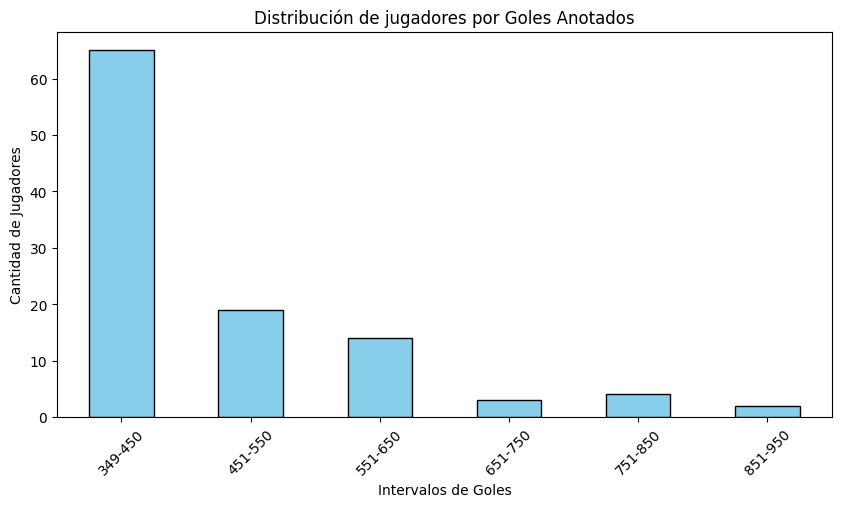

In [ ]:
# Contar la cantidad de jugadores en cada intervalo de goles
goles_counts = data['Goles_Intervalos'].value_counts().sort_index()

# Graficar el histograma
plt.figure(figsize=(10, 5))
goles_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Intervalos de Goles')
plt.ylabel('Cantidad de Jugadores')
plt.title('Distribución de jugadores por Goles Anotados')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


La mayoria de los jugadores se encuentran detras de los 450 goles, y muy pocos llegan a los 851

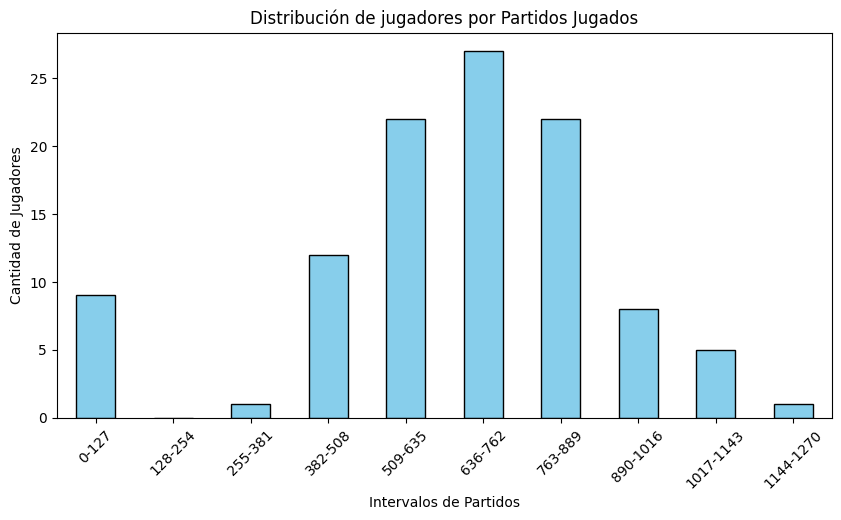

In [ ]:
# Contar la cantidad de jugadores en cada intervalo de Partidos jugados
Partidos_J = data['Partidos_Intervalos'].value_counts().sort_index()

# Graficar el histograma
plt.figure(figsize=(10, 5))
Partidos_J.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Intervalos de Partidos')
plt.ylabel('Cantidad de Jugadores')
plt.title('Distribución de jugadores por Partidos Jugados')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


El grafico nos muestra como la mayoria de jugadores se encuentran entre los grupos de 636-762,509-635 y 763-889

#### Resumen Estadistico:(posterior)

In [ ]:
#Resumen estadistico:
print(f'Medidas de tendencia:\n{data.describe()}\n\nvalores_nulos:\n{data.isnull().sum()}')
print(f'Valores atípicos en Goles:\n\nLímite Inferior:\n{Goles_lower}\n\nLímite Superior:\n{Goles_upper}\n\n\n')
print(f'Valores atípicos en Partidos Jugados:\n\nLímite Inferior:\n{P_J_lower}\n\nLímite Superior:\n{P_J_upper}\n\n')
print(f'Moda:\n{data.describe(include="object")}')

Medidas de tendencia:
            Goles          P_J
count  107.000000   107.000000
mean   470.925234   654.093458
std    117.517779   262.984594
min    350.000000     1.000000
25%    390.500000   543.000000
50%    427.000000   710.000000
75%    512.000000   813.500000
max    928.000000  1270.000000

valores_nulos:
Jugador                0
Goles                  0
P_J                    0
Temp                   0
Pais                   0
Goles_Intervalos       0
Partidos_Intervalos    0
dtype: int64
Valores atípicos en Goles:

Límite Inferior:
Empty DataFrame
Columns: [Jugador, Goles, P_J, Temp]
Index: []

Límite Superior:
              Jugador  Goles     P_J       Temp
17  Cristiano Ronaldo    928  1270.0   2002-Act
28     Erwin Helmchen    702     NaN  1923-1951
32      Ferenc Puskás    760   746.0  1943-1967
60        Josef Bican    805   530.0  1931-1955
66       Lionel Messi    854  1088.0   2004-Act
77               Pelé    770   812.0  1956-1977
87            Romário    761   96

#### Resultados

In [ ]:
#Comparacion de las medidas de tendencia y distribuciones:
"""
Se mantienen
de manera similar a
diferencia de las columnas creadas
"""
print(f'Distribuciones al inicio:\nCuantitativos:\n{data_Original.describe()}\nCualitativos:\n{data_Original.describe(include="object")}')
print(f'\n\nDistribuciones al final:\nCuantitativos:\n{data.describe()}\nCualitativos:\n{data.describe(include="object")}')

Distribuciones al inicio:
Cuantitativos:
            Goles          P_J
count  107.000000    98.000000
mean   470.925234   714.071429
std    117.517779   179.912192
min    350.000000   354.000000
25%    390.500000   578.750000
50%    427.000000   723.500000
75%    512.000000   816.000000
max    928.000000  1270.000000
Cualitativos:
            Jugador      Temp
count           107       107
unique          107        88
top     Abe Lenstra  2003-Act
freq              1         4


Distribuciones al final:
Cuantitativos:
            Goles          P_J
count  107.000000   107.000000
mean   470.925234   654.093458
std    117.517779   262.984594
min    350.000000     1.000000
25%    390.500000   543.000000
50%    427.000000   710.000000
75%    512.000000   813.500000
max    928.000000  1270.000000
Cualitativos:
            Jugador      Temp    Pais
count           107       107     107
unique          107        88      39
top     Abe Lenstra  2003-Act  Brasil
freq              1         4

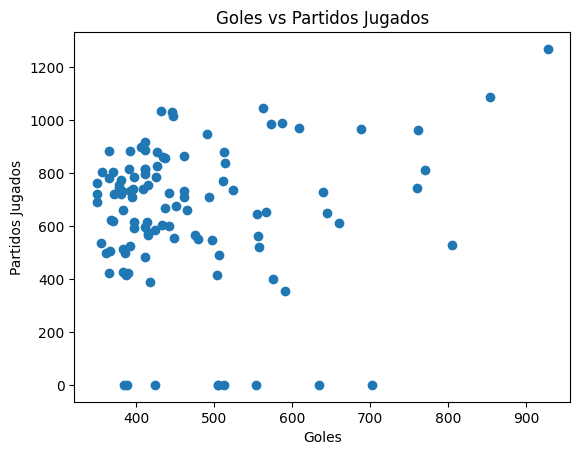

In [ ]:
plt.scatter(data['Goles'],data['P_J'])
plt.xlabel('Goles')
plt.ylabel('Partidos Jugados')
plt.title('Goles vs Partidos Jugados')
plt.show()

Con este grafico confirmo el comportamiento del grafico de barras anterior, el cual confirma que la mayoria de jugadores jugaron entre los grupos de los 500 y 800 partidos

In [ ]:
data

,Jugador,Goles,P_J,Temp,Pais,Goles_Intervalos,Partidos_Intervalos
0,Abe Lenstra,645,650.0,1936-1963,Países Bajos,551-650,636-762
1,Alan Shearer,382,733.0,1986-2005,Inglaterra,349-450,636-762
2,Albert De Cleyn,386,500.0,1933-1955,Bélgica,349-450,382-508
3,Alberto Spencer,451,678.0,1953-1972,Ecuador,451-550,636-762
4,Aleksandar Đurić,461,733.0,1994-2014,Singapur,451-550,636-762
...,...,...,...,...,...,...,...
102,Vágner Love,411,888.0,2002-Act,Brasil,349-450,763-889
103,Víctor Hugo Antelo,392,526.0,1980-2001,Bolivia,349-450,509-635
104,Wayne Rooney,366,883.0,2002-2021,Inglaterra,349-450,763-889
105,Zico,511,773.0,1971-1994,Brasil,451-550,763-889


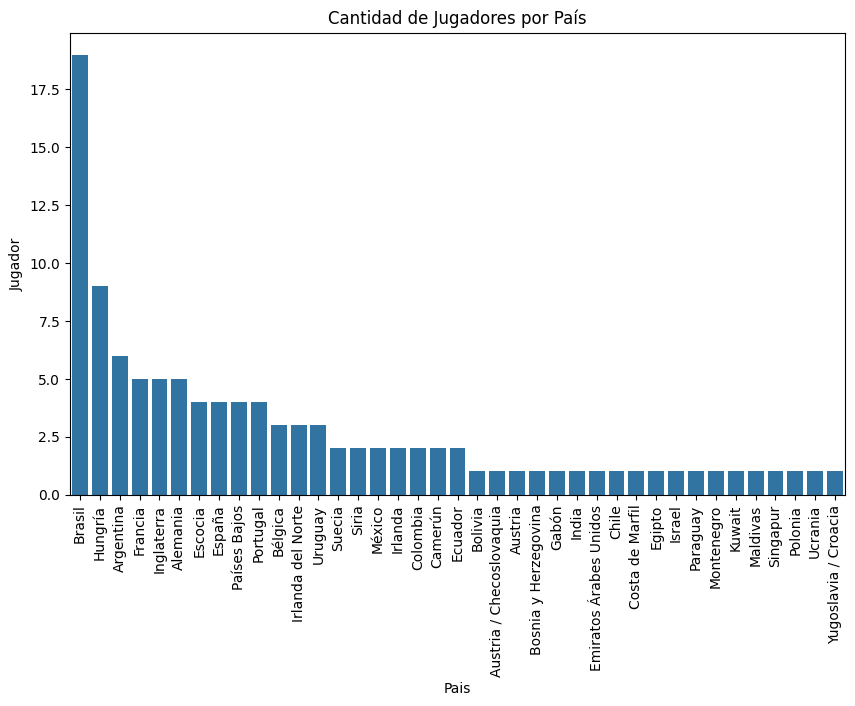

In [ ]:
#Cantidad de jugadores por paises
plt.figure(figsize=(10, 6))
sns.barplot(data.groupby('Pais')['Jugador'].count().sort_values(ascending=False) )
plt.title("Cantidad de Jugadores por País")
plt.xticks(rotation=90)
plt.show()


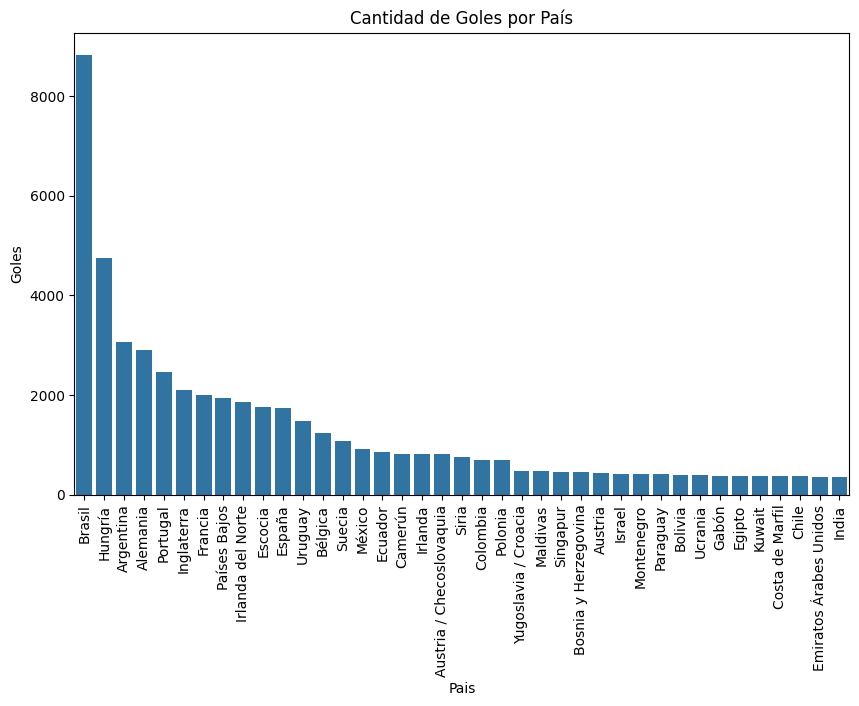

In [ ]:
#Cantidad de goles por pais:
#Cantidad de jugadores por paises
plt.figure(figsize=(10, 6))
sns.barplot(data.groupby('Pais')['Goles'].sum().sort_values(ascending=False) )
plt.title("Cantidad de Goles por País")
plt.xticks(rotation=90)
plt.show()


#### Reflexion y Conclusion

El tratamiento de valores atípicos y faltantes en el dataset de fútbol fue clave para garantizar la calidad del análisis. Al revisar los datos, encontramos jugadores con cifras de goles y partidos jugados altas o bajas en comparación con la mayoría. Esto nos llevó a cuestionarnos si se trataba de rendimientos excepcionales o de errores en la recolección de datos.Pero eran registros legítimos de figuras históricas, pero en otros, errores que podían sesgar nuestras conclusiones.

Por otro lado, los valores faltantes, representaban un desafío. Eliminarlos sin más podía llevar a la pérdida de información valiosa, mientras que imputarlos sin criterio podía distorsionar el análisis.

Al final este proceso nos permitió reflexionar sobre cómo los datos, si no se preparan correctamente, pueden conducir a interpretaciones erróneas. Un dataset limpio y bien estructurado no solo mejora la precisión de los análisis, sino que también permite extraer insights más confiables sobre el rendimiento y la trayectoria de los jugadores.







